In [ ]:
# Crypto Currency Analysis 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Plots within the cell
%matplotlib inline

In [4]:
# Importing for scikit learning machine learning algorithms(Linear Regression, RandomForest Regressor, Gradient Boosting Regression)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [5]:
# Installing dependencies( Seaborn )
!pip install seaborn
import seaborn as sns
# Default figure size
sns.set(
    rc={
        "figure.figsize": (15, 6)
    })


    100% |████████████████████████████████| 184kB 1.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/29/af/4b/ac6b04ec3e2da1a450e74c6a0e86ade83807b4aaf40466ecda
Successfully built seaborn
You are using pip version 9.0.1, however version 9.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
# CryptoAnalysis dataset from [kaggle]
#[kaggle] : https://www.kaggle.com/jessevent/all-crypto-currencies
data = pd.read_csv("https://raw.githubusercontent.com/rakeshsenapathi/DataVisualisation/master/crypto-markets.csv")



In [8]:
data.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702166 entries, 0 to 702165
Data columns (total 13 columns):
slug           702166 non-null object
symbol         702166 non-null object
name           702166 non-null object
date           702166 non-null object
ranknow        702166 non-null int64
open           702166 non-null float64
high           702166 non-null float64
low            702166 non-null float64
close          702166 non-null float64
volume         702166 non-null int64
market         702166 non-null int64
close_ratio    702166 non-null float64
spread         702166 non-null float64
dtypes: float64(6), int64(3), object(4)
memory usage: 69.6+ MB


In [10]:
data.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,702166.000000,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05
mean,734.561943,2.696117e+02,3.284954e+02,2.210024e+02,2.694796e+02,5.544493e+06,1.202024e+08,-inf,1.074927e+02
std,411.195482,1.219343e+04,1.558344e+04,9.686538e+03,1.217104e+04,1.673788e+08,3.074096e+09,NaN,7.207118e+03
min,1.000000,2.500000e-09,3.200000e-09,9.200000e-14,0.000000e+00,0.000000e+00,0.000000e+00,-inf,0.000000e+00
25%,397.000000,5.280000e-04,6.210000e-04,4.550000e-04,5.290000e-04,2.700000e+01,7.095000e+03,1.429000e-01,0.000000e+00
50%,746.000000,8.753000e-03,1.016400e-02,7.630000e-03,8.768000e-03,5.030000e+02,9.402450e+04,4.331000e-01,0.000000e+00
75%,1032.000000,1.333997e-01,1.523455e-01,1.170855e-01,1.336785e-01,1.325400e+04,1.326118e+06,7.703000e-01,3.000000e-02
max,1516.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.261410e+11,1.000000e+00,1.770563e+06


In [11]:
# Adding features like average hlc and ohlc to the data frame
data['date'] = pd.to_datetime(data['date'])

In [12]:
# Since the market value is huge, converting it to billions
data['market_inbillions'] = data['market'] / 1000000000 #Conversion to billions

In [13]:
data['hlc_average'] = (data['high'] + data['low'] + data['close'])/3 #high,low,close average
data['ohlc_average'] = (data['open'] + data['high'] + data['low'] + data['close'])/4 #open,high,low,close average


In [14]:
data.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,market_inbillions,hlc_average,ohlc_average
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88,1.50052,134.096667,134.3975
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49,1.49116,142.010000,140.1175
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88,1.59778,139.993333,140.9950
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17,1.54282,121.533333,125.9000
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32,1.29219,107.696667,109.8675


Text(0.5,1,'Top 10 currencies by Market Cap')

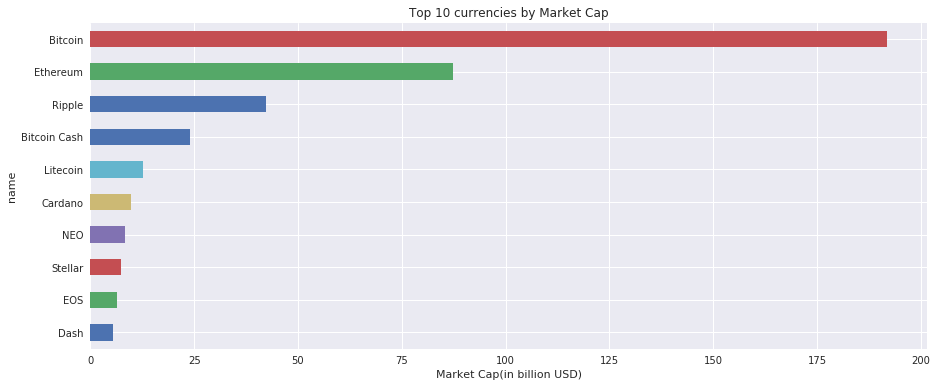

In [15]:
# Exploratory Analysis

# Grouping by name then sorting the values to get the top10 values using head(10)
top_10 = data.groupby('name').market_inbillions.last().sort_values(ascending = False).head(10).sort_values().plot(kind ='barh')
top_10.set_xlabel("Market Cap(in billion USD)");
plt.title("Top 10 currencies by Market Cap")	



In [16]:
# Getting top_10 crypto currency names.
top_10_names = data.groupby('name').market_inbillions.last().sort_values(ascending = False).head(10).index

In [17]:

# Copy top_10 into a data frame
top_10_currencies = data[data['name'].isin(top_10_names)]
top_10_currencies
bitcoin = data[data['name'] == 'Bitcoin']

[]

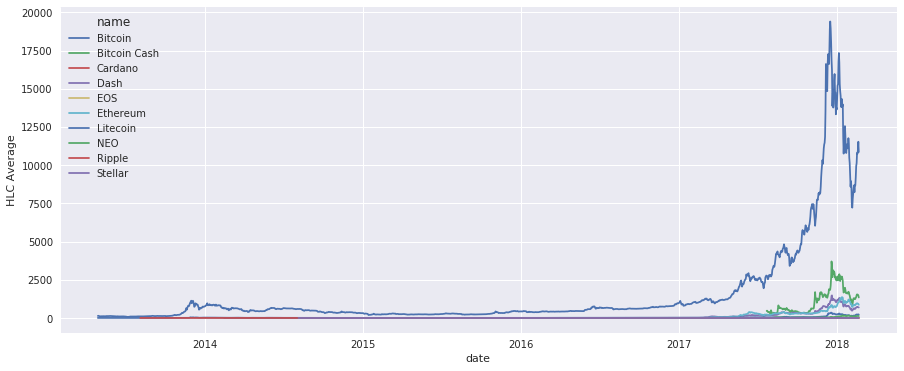

In [18]:
# Trends
# HLC Average pattern of the top 10 through each year
hlc_average_trend = top_10_currencies.groupby(['date' , 'name']).hlc_average.mean().unstack().plot()
hlc_average_trend.set_ylabel("HLC Average")
plt.plot()


[]

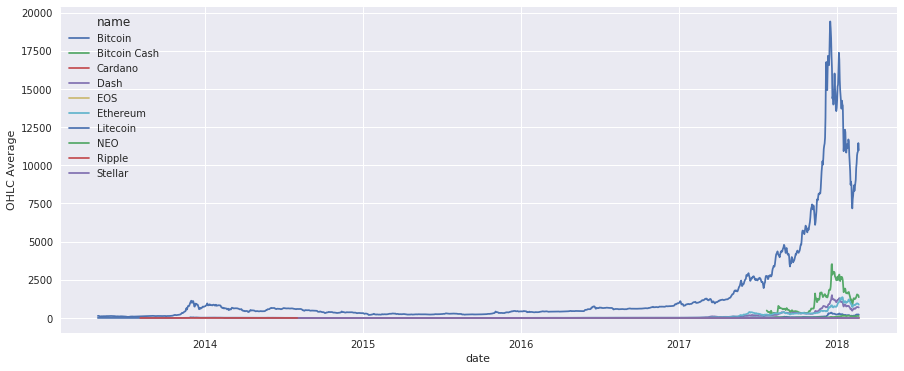

In [19]:
# OHLC Average pattern through the years
ohlc_average_trend = top_10_currencies.groupby(['date' , 'name']).ohlc_average.mean().unstack().plot()
ohlc_average_trend.set_ylabel("OHLC Average")
plt.plot()

[]

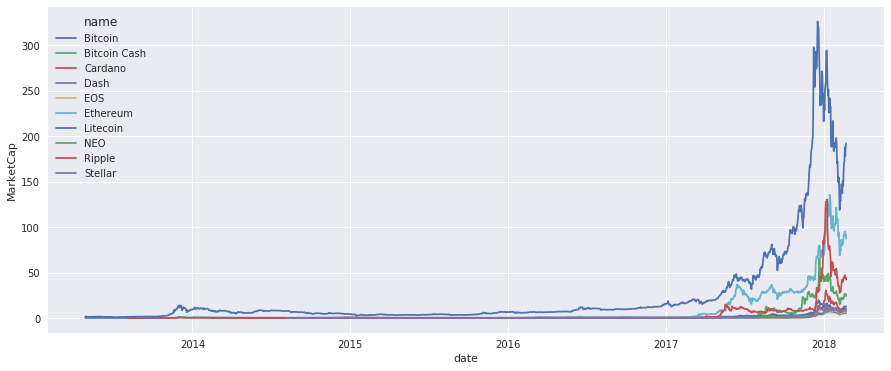

In [20]:
# Market Cap through the years
market_cap = top_10_currencies.groupby(['date' , 'name']).market_inbillions.mean().unstack().plot()
market_cap.set_ylabel("MarketCap")
plt.plot()

In [21]:
# Scikit Learning Algorithms
#Predicting Ethereum Currency
currency = data[data['name'] == 'Ethereum'].copy()
currency.drop(['volume','symbol','name','ranknow','market','slug','date'],axis=1,inplace=True)
currency.head()

,open,high,low,close,close_ratio,spread,market_inbillions,hlc_average,ohlc_average
1761,2.830000,3.540000,2.520000,2.770000,0.2451,1.02,0.000000,2.943333,2.915000
1762,2.790000,2.800000,0.714725,0.753325,0.0185,2.09,0.167911,1.422683,1.764512
1763,0.706136,0.879810,0.629191,0.701897,0.2901,0.25,0.042638,0.736966,0.729259
1764,0.713989,0.729854,0.636546,0.708448,0.7706,0.09,0.043130,0.691616,0.697209
1765,0.708087,1.130000,0.663235,1.070000,0.8715,0.47,0.042797,0.954412,0.892831


In [22]:
# Moving by 30 values up
currency['Price_After_Month']= data['close'].shift(-30)
currency['Price_After_Month']

1761    1.300000
1762    1.250000
1763    1.240000
1764    1.210000
1765    1.170000
1766    0.982978
1767    1.040000
1768    0.936003
1769    0.875622
1770    0.944410
1771    0.907175
1772    0.874231
1773    0.853685
1774    0.882391
1775    0.938445
1776    0.919047
1777    0.901796
1778    0.893406
1779    0.813610
1780    0.736223
1781    0.785964
1782    0.720839
1783    0.582886
1784    0.661146
1785    0.738644
1786    0.690215
1787    0.678574
1788    0.687171
1789    0.668379
1790    0.628643
          ...   
2661    0.005882
2662    0.005613
2663    0.004680
2664    0.004417
2665    0.004254
2666    0.004291
2667    0.004314
2668    0.004415
2669    0.004449
2670    0.004245
2671    0.003788
2672    0.003092
2673    0.003134
2674    0.005671
2675    0.005617
2676    0.005260
2677    0.006098
2678    0.006131
2679    0.005143
2680    0.005139
2681    0.005546
2682    0.006104
2683    0.006417
2684    0.006452
2685    0.006246
2686    0.005763
2687    0.005930
2688    0.0056

In [23]:

#Pre Processing
from sklearn import preprocessing
currency.dropna(inplace=True)
X=currency.drop('Price_After_Month',axis=1)
X
X=preprocessing.scale(X)
y=currency['Price_After_Month']

In [24]:
# Cross Validation
from sklearn import cross_validation
X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.3,random_state=101)

/srv/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:

# Using Random Forest Regressor algorithm
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(X_train,y_train)
accuracy=reg.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 73.1299 %


In [26]:

#  After the model is the fit to the training data, now we can predict
preds = reg.predict(X_test)
preds[0]


10.783800000000001

In [27]:
# y_test represents the actual values to the predicted values by the Random Forest Regressor
y_test = y_test.reset_index(drop = True)

In [28]:
y_test[0]

9.9

In [29]:
predict_ids = [x for x in range(len(preds)) ]
test_ids = [x for x in range(len(y_test)) ]

In [30]:
# Using a linear Model i.e Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
accuracy=reg.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 56.4142 %


In [31]:
# Linear Regression fits only 56.4142 accurately to our model
preds = reg.predict(X_test)
preds[0]

12.922306997083808

In [ ]:
y_test[0]